In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from scipy import stats
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

In [2]:
all_data = pd.read_csv('Survival_dataset.csv')

In [39]:
data, test = train_test_split(all_data, test_size=0.2)
data.shape, test.shape

((3200, 120), (800, 120))

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3200 entries, 2594 to 1446
Columns: 120 entries, recordid to UrineOutputSum
dtypes: float64(111), int64(9)
memory usage: 3.0 MB


In [41]:
data.columns.values[:6]

array(['recordid', 'SAPS-I', 'SOFA', 'Length_of_stay', 'Survival',
       'In-hospital_death'], dtype=object)

In [42]:
data[['recordid', 'SAPS-I', 'SOFA', 'Length_of_stay', 'Survival', 'In-hospital_death']].head()

,recordid,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
2594,139104,9,1,6,-1,0
928,134878,10,1,10,1046,0
2949,139974,11,8,21,205,0
870,134746,7,7,4,3,1
593,134068,20,8,72,-1,0


In [43]:
data.drop(['recordid', 'SAPS-I', 'SOFA', 'Length_of_stay', 'Survival'], axis=1, inplace=True)
test.drop(['recordid', 'SAPS-I', 'SOFA', 'Length_of_stay', 'Survival'], axis=1, inplace=True)
data.head()

E:\Program Files\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,SICU,DiasABP_first,GCS_first,...,SysABP_last,TroponinI_last,TroponinT_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum
2594,0,89.0,0.0,157.5,72.0,1,0,0,NaN,15.0,...,NaN,NaN,NaN,9.6,NaN,7.51,NaN,NaN,NaN,NaN
928,0,90.0,0.0,152.4,76.0,0,0,1,73.0,15.0,...,138.0,0.6,NaN,11.3,NaN,7.32,2696.0,80.0,1.0,2.0
2949,0,46.0,0.0,157.5,95.0,0,0,0,69.0,10.0,...,123.0,NaN,NaN,14.0,102.9,7.47,16.0,2790.0,1.0,15.0
870,1,58.0,0.0,NaN,152.2,0,0,0,48.0,15.0,...,146.0,NaN,NaN,15.8,152.2,NaN,NaN,NaN,NaN,NaN
593,0,66.0,0.0,172.7,84.0,0,0,1,62.0,14.0,...,138.0,NaN,NaN,12.8,NaN,7.45,619.0,2160.0,1.0,10.0


In [44]:
data.columns.values

array(['In-hospital_death', 'Age', 'Gender', 'Height', 'Weight', 'CCU',
       'CSRU', 'SICU', 'DiasABP_first', 'GCS_first', 'Glucose_first',
       'HR_first', 'MAP_first', 'NIDiasABP_first', 'NIMAP_first',
       'NISysABP_first', 'RespRate_first', 'SaO2_first', 'Temp_first',
       'DiasABP_last', 'GCS_last', 'Glucose_last', 'HR_last', 'MAP_last',
       'NIDiasABP_last', 'NIMAP_last', 'NISysABP_last', 'RespRate_last',
       'SaO2_last', 'Temp_last', 'DiasABP_lowest', 'GCS_lowest',
       'Glucose_lowest', 'HR_lowest', 'MAP_lowest', 'NIDiasABP_lowest',
       'NIMAP_lowest', 'NISysABP_lowest', 'RespRate_lowest',
       'SaO2_lowest', 'Temp_lowest', 'DiasABP_highest', 'GCS_highest',
       'Glucose_highest', 'HR_highest', 'MAP_highest',
       'NIDiasABP_highest', 'NIMAP_highest', 'NISysABP_highest',
       'RespRate_highest', 'SaO2_highest', 'Temp_highest',
       'DiasABP_median', 'GCS_median', 'Glucose_median', 'HR_median',
       'MAP_median', 'NIDiasABP_median', 'NIMAP_median',

In [45]:
data[['MechVentDuration', 'MechVentLast8Hour', 'MechVentStartTime']].corr()

,MechVentDuration,MechVentLast8Hour,MechVentStartTime
MechVentDuration,1.000000,0.742006,-0.408208
MechVentLast8Hour,0.742006,1.000000,0.133645
MechVentStartTime,-0.408208,0.133645,1.000000


In [46]:
# data.drop(['MechVentLast8Hour'], axis=1, inplace=True)
# test.drop(['MechVentLast8Hour'], axis=1, inplace=True)

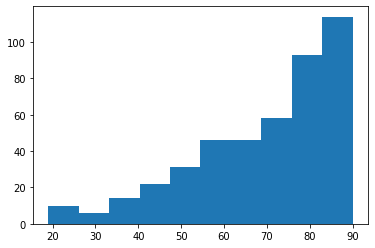

In [47]:
plt.hist(data[data['In-hospital_death']==1]['Age'])
plt.show()

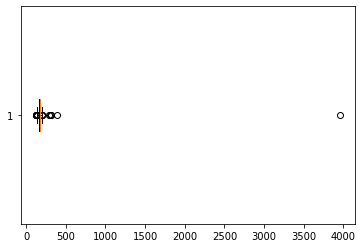

NaN      1522
177.8     162
182.9     155
170.2     140
167.6     137
Name: Height, dtype: int64

In [48]:
plt.boxplot(data[data['Height'].isna() == False]['Height'], vert=False)
plt.show()
data['Height'].value_counts(dropna=False).iloc[:5]

In [49]:
data.loc[data['Height'] > 220, 'Height'] = data.loc[data['Height'] <= 220, 'Height'].mean() + np.random.normal(0,10, data.loc[data['Height'] > 220, 'Height'].shape[0])
data.loc[data['Height'].isna(), 'Height'] = data.loc[data['Height'] <= 220, 'Height'].mean() + np.random.normal(0,10, data.loc[data['Height'].isna(), 'Height'].shape[0])

test.loc[test['Height'] > 220, 'Height'] = test.loc[test['Height'] <= 220, 'Height'].mean() + np.random.normal(0,10, test.loc[test['Height'] > 220, 'Height'].shape[0])
test.loc[test['Height'].isna(), 'Height'] = test.loc[test['Height'] <= 220, 'Height'].mean() + np.random.normal(0,10, test.loc[test['Height'].isna(), 'Height'].shape[0])


E:\Program Files\Python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
E:\Program Files\Python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
E:\Program Files\Python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

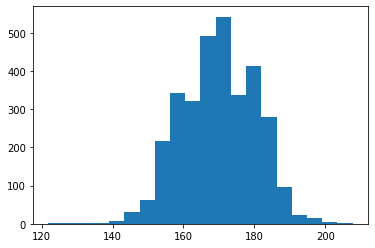

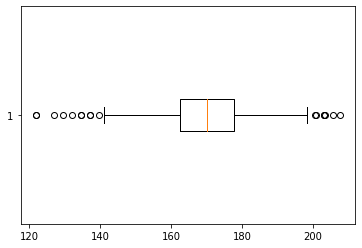

177.8    162
182.9    155
170.2    140
167.6    137
172.7    132
Name: Height, dtype: int64

In [50]:
plt.hist(data['Height'], bins=20)
plt.show()
plt.boxplot(data['Height'], vert=False)
plt.show()
data['Height'].value_counts(dropna=False).iloc[:5]

In [51]:
data['Gender'].value_counts(dropna=False)

1.0    1797
0.0    1400
NaN       3
Name: Gender, dtype: int64

In [52]:
data.corr()['Gender'][data.corr()['Gender'] > 0.3]

Gender    1.000000
Height    0.340983
Name: Gender, dtype: float64

In [53]:
gender_heights_mean = data[data['Gender'] == 0]['Height'].mean()/2 + data[data['Gender'] == 1]['Height'].mean()/2
for i in data[data['Gender'].isna()]['Gender'].index:
    data.at[i, 'Gender'] = 0 if data.at[i, 'Height'] < gender_heights_mean else 1

gender_heights_mean_test = test[test['Gender'] == 0]['Height'].mean()/2 + test[test['Gender'] == 1]['Height'].mean()/2
for i in test[test['Gender'].isna()]['Gender'].index:
    test.at[i, 'Gender'] = 0 if test.at[i, 'Height'] < gender_heights_mean_test else 1

data['Gender'].value_counts(dropna=False)

1.0    1800
0.0    1400
Name: Gender, dtype: int64

In [54]:
data['Weight'].value_counts(dropna=False).iloc[:5]

NaN     272
70.0     81
80.0     59
90.0     49
60.0     48
Name: Weight, dtype: int64

In [55]:
data[[col for col in data.columns if 'Weight' in col]].corr()

,Weight,Weight_first,Weight_last
Weight,1.000000,0.967651,0.940724
Weight_first,0.967651,1.000000,0.973367
Weight_last,0.940724,0.973367,1.000000


In [56]:
data.drop(['Weight_first', 'Weight_last'], axis=1, inplace=True)
test.drop(['Weight_first', 'Weight_last'], axis=1, inplace=True)

E:\Program Files\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


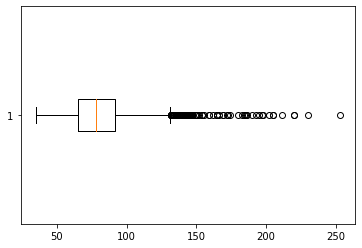

In [57]:
plt.boxplot(data[data['Weight'].isna() == False]['Weight'], vert=False)
plt.show()

In [58]:
data.loc[data['Weight'] > 150, 'Weight'] = data.loc[data['Weight'] <= 150, 'Weight'].mean() + np.random.normal(0,5, data.loc[data['Weight'] > 150, 'Weight'].shape[0])
data.loc[data['Weight'].isna(), 'Weight'] = data.loc[data['Weight'] <= 150, 'Weight'].mean() + np.random.normal(0,5, data.loc[data['Weight'].isna(), 'Weight'].shape[0])

test.loc[test['Weight'] > 150, 'Weight'] = test.loc[test['Weight'] <= 150, 'Weight'].mean() + np.random.normal(0,5, test.loc[test['Weight'] > 150, 'Weight'].shape[0])
test.loc[test['Weight'].isna(), 'Weight'] = test.loc[test['Weight'] <= 150, 'Weight'].mean() + np.random.normal(0,5, test.loc[test['Weight'].isna(), 'Weight'].shape[0])

E:\Program Files\Python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
E:\Program Files\Python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
E:\Program Files\Python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

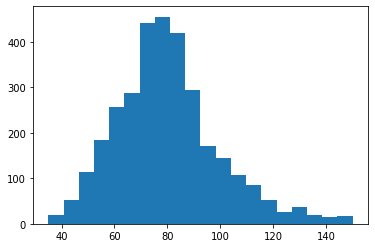

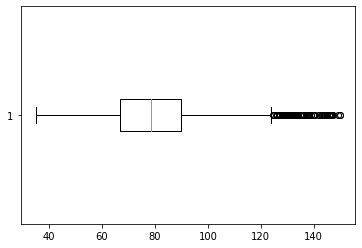

70.0    81
80.0    59
90.0    49
65.0    48
60.0    48
Name: Weight, dtype: int64

In [59]:
plt.hist(data['Weight'], bins=20)
plt.show()
plt.boxplot(data['Weight'], vert=False)
plt.show()
data['Weight'].value_counts(dropna=False).iloc[:5]

In [60]:
firsts = [col for col in data.columns if '_first' in col]
lasts = [col for col in data.columns if '_last' in col]
medians = [col for col in data.columns if '_median' in col]
highests = [col for col in data.columns if '_highest' in col]
lowests = [col for col in data.columns if '_lowest' in col]

ts_cols = list(map(lambda col: col.split('_')[0], firsts))

In [61]:
nan_tol = 0.7
(data.isna().sum()[data.isna().sum() > data.shape[0]*nan_tol])

RespRate_first       2307
RespRate_last        2307
RespRate_lowest      2307
RespRate_highest     2307
RespRate_median      2307
Cholesterol_first    2947
TroponinI_first      3034
TroponinT_first      2521
Cholesterol_last     2947
TroponinI_last       3034
TroponinT_last       2521
dtype: int64

In [62]:
# Removing columns with most NaN-s
cols_to_remove = data.isna().sum()[data.isna().sum() > data.shape[0]*nan_tol].index
print(cols_to_remove)
data.drop(cols_to_remove, axis=1, inplace=True)
test.drop(cols_to_remove, axis=1, inplace=True)
data.info()

Index(['RespRate_first', 'RespRate_last', 'RespRate_lowest',
       'RespRate_highest', 'RespRate_median', 'Cholesterol_first',
       'TroponinI_first', 'TroponinT_first', 'Cholesterol_last',
       'TroponinI_last', 'TroponinT_last'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3200 entries, 2594 to 1446
Columns: 102 entries, In-hospital_death to UrineOutputSum
dtypes: float64(98), int64(4)
memory usage: 2.6 MB


E:\Program Files\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [63]:
data[(np.abs(stats.zscore(data)) > 3).all(axis=1)] = np.nan
test[(np.abs(stats.zscore(test)) > 3).all(axis=1)] = np.nan

<ipython-input-63-b4dca7b56764>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[(np.abs(stats.zscore(data)) > 3).all(axis=1)] = np.nan
E:\Program Files\Python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-63-b4dca7b56764>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [64]:
# imputer = KNNImputer(n_neighbors=2, weights='distance')
# imputer.fit(data)

# data = pd.DataFrame(imputer.transform(data), columns=data.columns)
# test = pd.DataFrame(imputer.transform(test), columns=test.columns)

In [65]:
iimputer = IterativeImputer()
iimputer.fit(data)

data = pd.DataFrame(iimputer.transform(data), columns=data.columns)
test = pd.DataFrame(iimputer.transform(test), columns=test.columns)

E:\Program Files\Python39\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [66]:
data.isna().sum()

In-hospital_death    0
Age                  0
Gender               0
Height               0
Weight               0
                    ..
pH_last              0
MechVentStartTime    0
MechVentDuration     0
MechVentLast8Hour    0
UrineOutputSum       0
Length: 102, dtype: int64

In [67]:
X = data[data.columns.difference(['In-hospital_death'])]
y = data['In-hospital_death']
Xt = test[test.columns.difference(['In-hospital_death'])]
yt = test['In-hospital_death']

In [73]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier

In [69]:
dtc = DecisionTreeClassifier()

tree_params = {
    'min_samples_split': np.arange(6, 12, 1),
    # 'max_leaf_nodes':[30, 35, 38, 40, 42, 45, 50],
    'max_leaf_nodes':[40, 45, 48, 50,],
    'class_weight': [dict((y.value_counts().sum() - y.value_counts()) / y.value_counts().sum())]
}

k = 10

In [70]:
gbc = GradientBoostingClassifier()

gb_params = {
    'n_estimators': [20, 30],
    'learning_rate': [0.1, 0.5, 1, 1.5, 2],
    'max_depth': [1],
    'class_weight': [dict((y.value_counts().sum() - y.value_counts()) / y.value_counts().sum())]
}

In [71]:
rfc = RandomForestClassifier()

rf_params = {
    'n_estimators': [80, 100, 120],
    'max_leaf_nodes': np.arange(4, 8, 1),
    'max_depth': np.arange(2, 4, 1),
    'class_weight': [dict((y.value_counts().sum() - y.value_counts()) / y.value_counts().sum())]
}

In [110]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=30,
    max_leaf_nodes=7,
    class_weight=dict((y.value_counts().sum() - y.value_counts()) / y.value_counts().sum()),
    n_jobs=4)

clf = AdaBoostClassifier(base_estimator=rf, n_estimators=10)


In [111]:
clf.fit(X, y)

AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight={0.0: 0.1375,
                                                                       1.0: 0.8625},
                                                         max_leaf_nodes=7,
                                                         min_samples_split=30,
                                                         n_jobs=4),
                   n_estimators=10)

In [112]:
y_pred_train = clf.predict(X)
y_pred = clf.predict(Xt)

# RMSE
print("Train f1:", f1_score(y, y_pred_train))
print("Test f1:", f1_score(yt, y_pred))

Train f1: 0.6889074228523769
Test f1: 0.5194805194805195


In [36]:
clf = GridSearchCV(rfc, rf_params, cv=k, scoring='f1', n_jobs=3)
clf.fit(X, y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'class_weight': [{0.0: 0.1390625, 1.0: 0.8609375}],
                         'max_depth': array([2, 3]),
                         'max_leaf_nodes': array([4, 5, 6, 7]),
                         'n_estimators': [80, 100, 120]},
             scoring='f1')

In [37]:
clf.best_estimator_

RandomForestClassifier(class_weight={0.0: 0.1390625, 1.0: 0.8609375},
                       max_depth=3, max_leaf_nodes=7)

In [38]:
clf.best_score_

0.4446719354883606

In [224]:
clf1 = clf.best_estimator_
train_f1 = []
test_f1 = []
f1 = []

kf_cv = KFold(n_splits=k, shuffle=True)

for train_index, test_index in kf_cv.split(X):
    # Train-test split
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
    # Fit
    clf1.fit(X_train, y_train)
    # Prediction
    y_pred_train = clf1.predict(X_train)    # Local train
    y_pred_test = clf1.predict(X_test)      # Local test
    y_pred = clf1.predict(Xt)

    # RMSE
    train_f1.append(f1_score(y_train, y_pred_train))
    test_f1.append(f1_score(y_test, y_pred_test))
    f1.append(f1_score(yt, y_pred))


print('Local train F1:', np.array(train_f1).mean())
print('Local test F1: ', np.array(test_f1).mean())
print('Unseen test F1:', np.array(f1).mean())

Local train F1: 0.48875273592262536
Local test F1:  0.45244629567801786
Unseen test F1: 0.4378108516662141


In [225]:
clf2 = RandomForestClassifier(class_weight={0.0: 0.145625, 1.0: 0.854375},
                       max_depth=4, max_leaf_nodes=50, n_estimators=50)

train_f1 = []
test_f1 = []
f1 = []

kf_cv = KFold(n_splits=k, shuffle=True)

for train_index, test_index in kf_cv.split(X):
    # Train-test split
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
    # Fit
    clf2.fit(X_train, y_train)
    # Prediction
    y_pred_train = clf2.predict(X_train)    # Local train
    y_pred_test = clf2.predict(X_test)      # Local test
    y_pred = clf2.predict(Xt)

    # RMSE
    train_f1.append(f1_score(y_train, y_pred_train))
    test_f1.append(f1_score(y_test, y_pred_test))
    f1.append(f1_score(yt, y_pred))


print('Local train F1:', np.array(train_f1).mean())
print('Local test F1: ', np.array(test_f1).mean())
print('Unseen test F1:', np.array(f1).mean())

Local train F1: 0.5451709335598223
Local test F1:  0.45843168431029013
Unseen test F1: 0.45697667819888715


In [226]:
clf2 = RandomForestClassifier(class_weight={0.0: 0.140625, 1.0: 0.859375},
                       max_depth=4, max_leaf_nodes=50, n_estimators=50)

train_f1 = []
test_f1 = []
f1 = []

kf_cv = KFold(n_splits=k, shuffle=True)

for train_index, test_index in kf_cv.split(X):
    # Train-test split
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
    # Fit
    clf2.fit(X_train, y_train)
    # Prediction
    y_pred_train = clf2.predict(X_train)    # Local train
    y_pred_test = clf2.predict(X_test)      # Local test
    y_pred = clf2.predict(Xt)

    # RMSE
    train_f1.append(f1_score(y_train, y_pred_train))
    test_f1.append(f1_score(y_test, y_pred_test))
    f1.append(f1_score(yt, y_pred))


print('Local train F1:', np.array(train_f1).mean())
print('Local test F1: ', np.array(test_f1).mean())
print('Unseen test F1:', np.array(f1).mean())

Local train F1: 0.5384822393242789
Local test F1:  0.45663996065051116
Unseen test F1: 0.4427970227089378
